In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
import os
import shutil
from datetime import datetime
import glob
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure

os.chdir("C:\\Users\\mohda\\Documents\\")

In [102]:
df=pd.read_parquet("final_dataset.gzip")
df.head(10)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual
5,5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35.0,41.8969,-87.6217,41.8923,-87.6120,member
6,6,A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635.0,41.8923,-87.6120,41.8957,-87.6201,member
7,7,FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382.0,41.8665,-87.6847,41.8747,-87.6864,casual
8,8,9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359.0,41.8949,-87.6323,41.9035,-87.6434,casual
9,9,A8FFF89140C33017,docked_bike,2020-04-04 15:02:28,2020-04-04 15:19:47,Kedzie Ave & Lake St,377,Central Park Ave & North Ave,508.0,41.8846,-87.7063,41.9097,-87.7166,member


In [98]:
#Convert dates

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['year']=pd.DatetimeIndex(df['started_at']).year
df['month'] = pd.DatetimeIndex(df['started_at']).month

df['day'] = pd.DatetimeIndex(df['started_at']).day

df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

df['date'] = df['year_month'].astype(str) + '-' + df['day'].astype(str)
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year,month,year_month,day,date
0,0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,2020,4,2020-4,26,2020-04-26
1,1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,2020,4,2020-4,17,2020-04-17
2,2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,2020,4,2020-4,1,2020-04-01
3,3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,2020,4,2020-4,7,2020-04-07
4,4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,2020,4,2020-4,18,2020-04-18


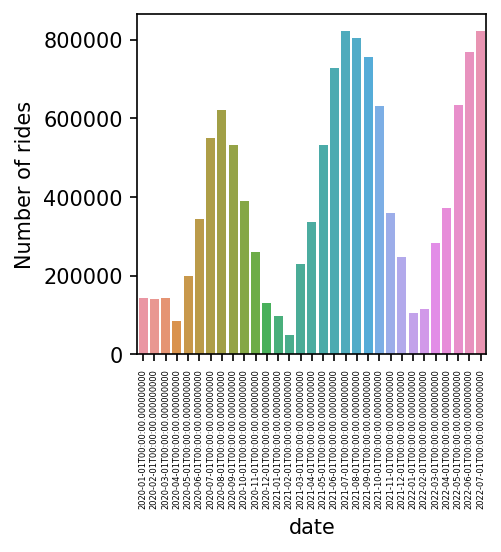

In [50]:
#Let's look at tghe distribution of rides. There is clear seasonality
df_y = df.groupby(['year_month'],as_index=False).agg({'ride_id':'count'})

figure(figsize=(3, 3), dpi=150)
ax = sns.barplot(x="year_month", y="ride_id", data=df_y)
ax.set(xlabel='date', ylabel='Number of rides')
plt.xticks(fontsize = 4,rotation = 90)
plt.savefig('capstone/visualizations/count_by_date.png')


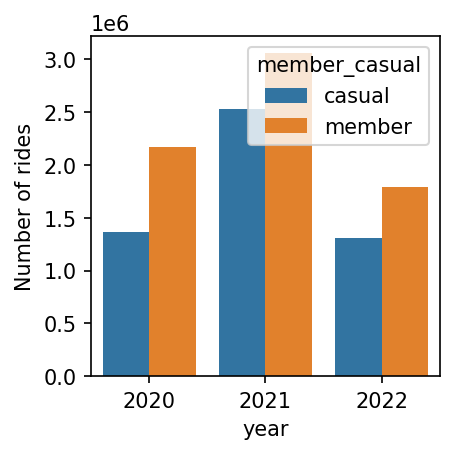

In [51]:
#From this, we can tell that 2021 was a peak year for rides.

df_y = df.groupby(['member_casual','year'],as_index=False).agg({'ride_id':'count'})

figure(figsize=(3, 3), dpi=150)
ax = sns.barplot(x="year", y="ride_id",hue="member_casual", data=df_y)
ax.set(xlabel='year', ylabel='Number of rides')

plt.savefig('capstone/visualizations/count_by_member_type.png')

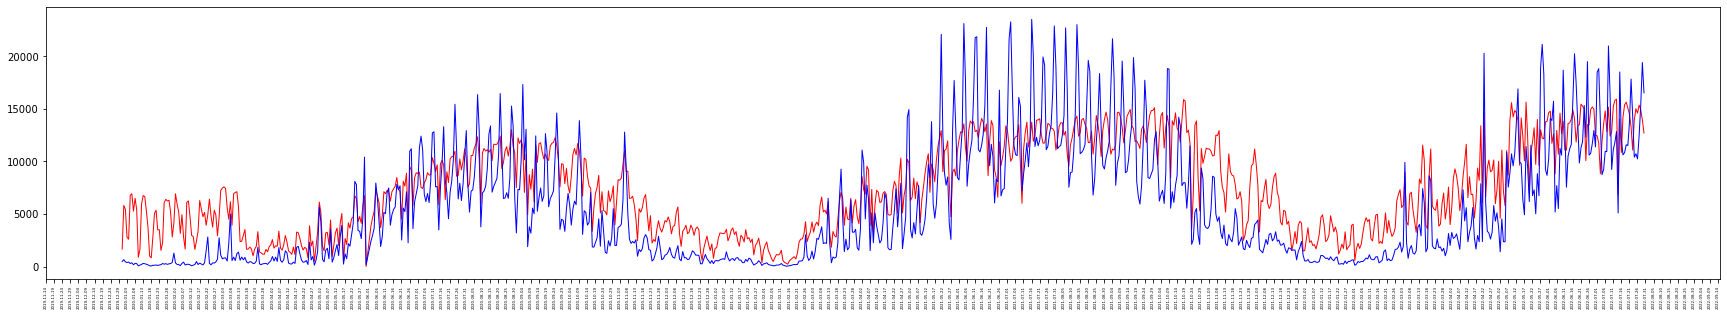

In [99]:
#Check the time series trend of this seasonality
fig,ax=plt.subplots()
fig.set_size_inches(30,5)

df_y = df.groupby(['member_casual','date'],as_index=False).agg({'ride_id':'count'})
df_y_2 = df_y[df_y['member_casual']=='casual']
df_y_1= df_y[df_y['member_casual']=='member']

ax.plot(df_y_1['date'],df_y_1['ride_id'],color='red',label='member',linewidth=1)
ax.plot(df_y_2['date'],df_y_2['ride_id'],color='blue',label='casual',linewidth=1)
plt.xticks(fontsize = 4,rotation = 90)

#Decrease x tick frequency
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5))

plt.show()

#Note taht this is too noisy
fig.savefig('capstone/visualizations/ts_raw.jpg',dpi=600)

In [93]:
#Now use rolling average. 



'2020-01-01-1'

In [97]:
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year,month,year_month,day,date
0,0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,2020,4,2020-04-01,26,2020-04-01-26
1,1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,2020,4,2020-04-01,17,2020-04-01-17
2,2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,2020,4,2020-04-01,1,2020-04-01-1
3,3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,2020,4,2020-04-01,7,2020-04-01-7
4,4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,2020,4,2020-04-01,18,2020-04-01-18
